In [1]:
import math
import string
import sys
import os

#sys.path.append("./udacity-ud120/")
#from mystatslib import *
import datetime as DT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
from matplotlib.dates import num2date
from IPython.display import display, Image

from yahoo_finance import Share
from yahoo_finance import Currency

%matplotlib inline

print "HelloWorld! We have imported what we want!"

HelloWorld! We have imported what we want!


In [2]:
try:
    stock = Share('THR')
    print "Success?"
    print stock.get_info()
except Exception as e:
    print ("Data could not be loaded:")
    print(e)    

Success?
{'symbol': 'THR'}


In [3]:
def display_stock_info(stock):
    print "date/time:", stock.get_trade_datetime()
    print "current_price:", stock.get_price()
    print "volume:",stock.get_volume()
    print "open:",stock.get_open()
    print "high:",stock.get_days_high()
    print "low:",stock.get_days_low()
    print "market cap:",stock.get_market_cap()
    print "P/E ratio:",stock.get_price_earnings_ratio()
    print "div yield:",stock.get_dividend_yield()
    
display_stock_info(stock)


date/time: 2016-09-28 18:16:00 UTC+0000
current_price: 19.11
volume: 25622
open: 18.88
high: 19.13
low: 18.88
market cap: 616.43M
P/E ratio: 29.40
div yield: None


In [4]:
try:
    stock.refresh()
    print "Data refreshed"
except Exception as e:
    print ("Data could not be loaded:")
    print("error",e)  


display_stock_info(stock)

Data refreshed
date/time: 2016-09-28 18:16:00 UTC+0000
current_price: 19.11
volume: 25622
open: 18.88
high: 19.13
low: 18.88
market cap: 616.43M
P/E ratio: 29.40
div yield: None


In [9]:
hist_begin='2015-09-28'
hist_end='2016-09-28'
try:
    stock_historical=stock.get_historical(hist_begin, hist_end)
    print "Historical data collected"
except Exception as e:
    print ("Data could not be loaded:")
    print("error",e)  
  


Historical data collected


In [6]:
#print stock_historical
stock_hist=pd.DataFrame(stock_historical)
stock_hist['Date']=pd.to_datetime(stock_hist['Date'] )
display(stock_hist.head(4))

stock_hist['Date'] = stock_hist.Date.astype(np.int64)
stock_hist['Adj_Close'] = stock_hist.Adj_Close.astype(np.float)
stock_hist['Close'] = stock_hist.Close.astype(np.float)
stock_hist['High'] = stock_hist.High.astype(np.float)
stock_hist['Low'] = stock_hist.Low.astype(np.float)
stock_hist['Open'] = stock_hist.Open.astype(np.float)
stock_hist['Volume'] = stock_hist.Volume.astype(np.int64)
stock_hist['Date']=pd.to_datetime(stock_hist['Date'] )
print stock_hist.info()
display(stock_hist.head(4))



,Adj_Close,Close,Date,High,Low,Open,Symbol,Volume
0,18.83,18.83,2016-09-27,18.870001,18.530001,18.57,THR,65300
1,18.66,18.66,2016-09-26,18.799999,18.58,18.790001,THR,99600
2,18.780001,18.780001,2016-09-23,19.42,18.77,19.15,THR,121800
3,19.219999,19.219999,2016-09-22,19.23,18.91,19.030001,THR,97000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 253 entries, 0 to 252
Data columns (total 8 columns):
Adj_Close    253 non-null float64
Close        253 non-null float64
Date         253 non-null datetime64[ns]
High         253 non-null float64
Low          253 non-null float64
Open         253 non-null float64
Symbol       253 non-null object
Volume       253 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 17.8+ KB
None


,Adj_Close,Close,Date,High,Low,Open,Symbol,Volume
0,18.830000,18.830000,2016-09-27,18.870001,18.530001,18.570000,THR,65300
1,18.660000,18.660000,2016-09-26,18.799999,18.580000,18.790001,THR,99600
2,18.780001,18.780001,2016-09-23,19.420000,18.770000,19.150000,THR,121800
3,19.219999,19.219999,2016-09-22,19.230000,18.910000,19.030001,THR,97000


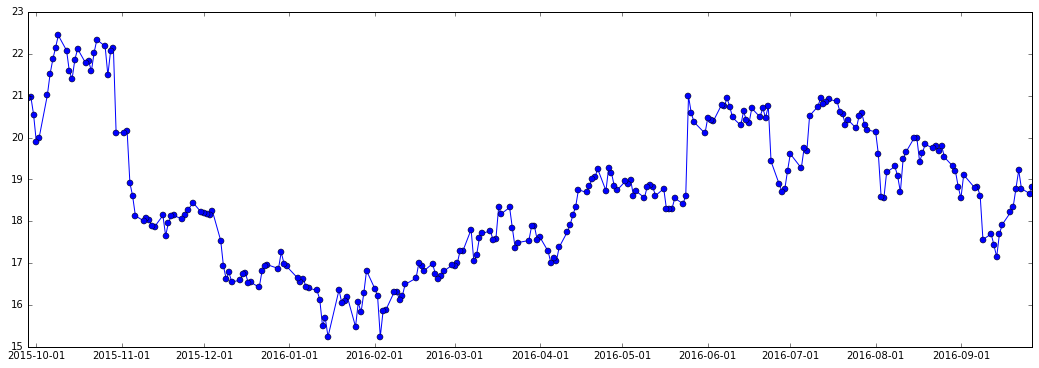

In [7]:
#x = [date2num(date) for (date, value) in Adj_Close_historical]
x = stock_hist['Date']

#y = [value for (date, value) in Adj_Close_historical]
y = stock_hist['Adj_Close']

fig = plt.figure(figsize=(18,6))

graph = fig.add_subplot(111)

# Plot the data as a red line with round markers
graph.plot(x,y,'b-o')

# Set the labels for the xticks used to cooresponding date 
ticklabels= [num2date(i).strftime("%Y-%m-%d") for i in graph.get_xticks().tolist()]
graph.set_xticklabels(ticklabels)

plt.show()
plt.close()

### EOF